# Breast Cancer Diagnosis Analysis

### Aim: Build a machine learning model to predict whether a tumor is malignant or benign.

## Step 1: Loading the Dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [102]:
pd.set_option('display.max_columns',None)

In [103]:
data=pd.read_csv(r"C:\Users\ATHIRA S\Downloads\archive (31)\data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [104]:
data.shape

(569, 33)

In [105]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [106]:
data=data.drop(columns=['Unnamed: 32','id'])

In [107]:
data.duplicated().sum()

0

In [108]:
data.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Variables
- id:	A unique identifier for each row in the dataset.
- diagnosis:	Indicates the diagnosis of the disease (e.g., "M" for malignant cancer or "B" for benign cancer)
- radius_mean:	Mean radius of the cells.
- texture_mean:	Mean texture value of the cells.
- perimeter_mean:	Mean perimeter of the cells.
- area_mean:	Mean area of the cells.
- smoothness_mean:	Mean smoothness value of the cells..
- compactness_mean: Mean compactness value of the cells..
- concave points_mean:	Mean concave points value of the cells.
- concavity_mean:	Mean concavity value of the cells
- smoothness_mean:	Mean smoothness value of the cells.
- symmetry_mean:	Mean symmetry value of the cells.
- fractal_dimension_mean:	Mean fractal dimension value of the cells.
- radius_se: The standard error of the radius of the cells
- texture_se:	The standard error of the texture value for the cells
- perimeter_se:	The standard error of the perimeter of the cells.
- area_se:	The standard error of the area of the cells.
- smoothness_se:	The standard error of the smoothness value for the cells.
- compactness_se:	The standard error of the compactness value for the cells
- concavity_se:	The standard error of the concavity value for the cells.
- concave points_se:	The standard error of the concave points value for the cells
- symmetry_se:	The standard error of the symmetry value for the cells.
- fractal_dimension_se:	The standard error of the fractal dimension value for the cells.
- radius_worst:	Worst (largest) radius observed in the cells.
- texture_worst:	Worst (largest) texture value observed in the cells.
- perimeter_worst:	Worst (largest) perimeter observed in the cells.
- area_worst:	Worst (largest) area observed in the cells.
- smoothness_worst:	Worst (lowest) smoothness value observed in the cells.
- compactness_worst:	Worst (lowest) compactness value observed in the cells.
- concavity_worst:	Worst (lowest) concavity value observed in the cells.
- concave points_worst:	Worst (lowest) concave points value observed in the cells.
- symmetry_worst:	Worst (lowest) symmetry value observed in the cells.
- fractal_dimension_worst:	Worst (lowest) fractal dimension value observed in the cells.

## Step 2: Exploratory Data Analysis (EDA)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [111]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

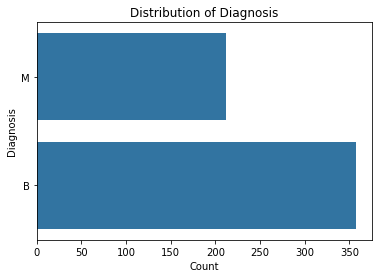

In [114]:
sns.countplot(data['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

In [115]:
data['diagnosis']=[1 if i.strip()=='M' else 0 for  i in data.diagnosis]

In [116]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

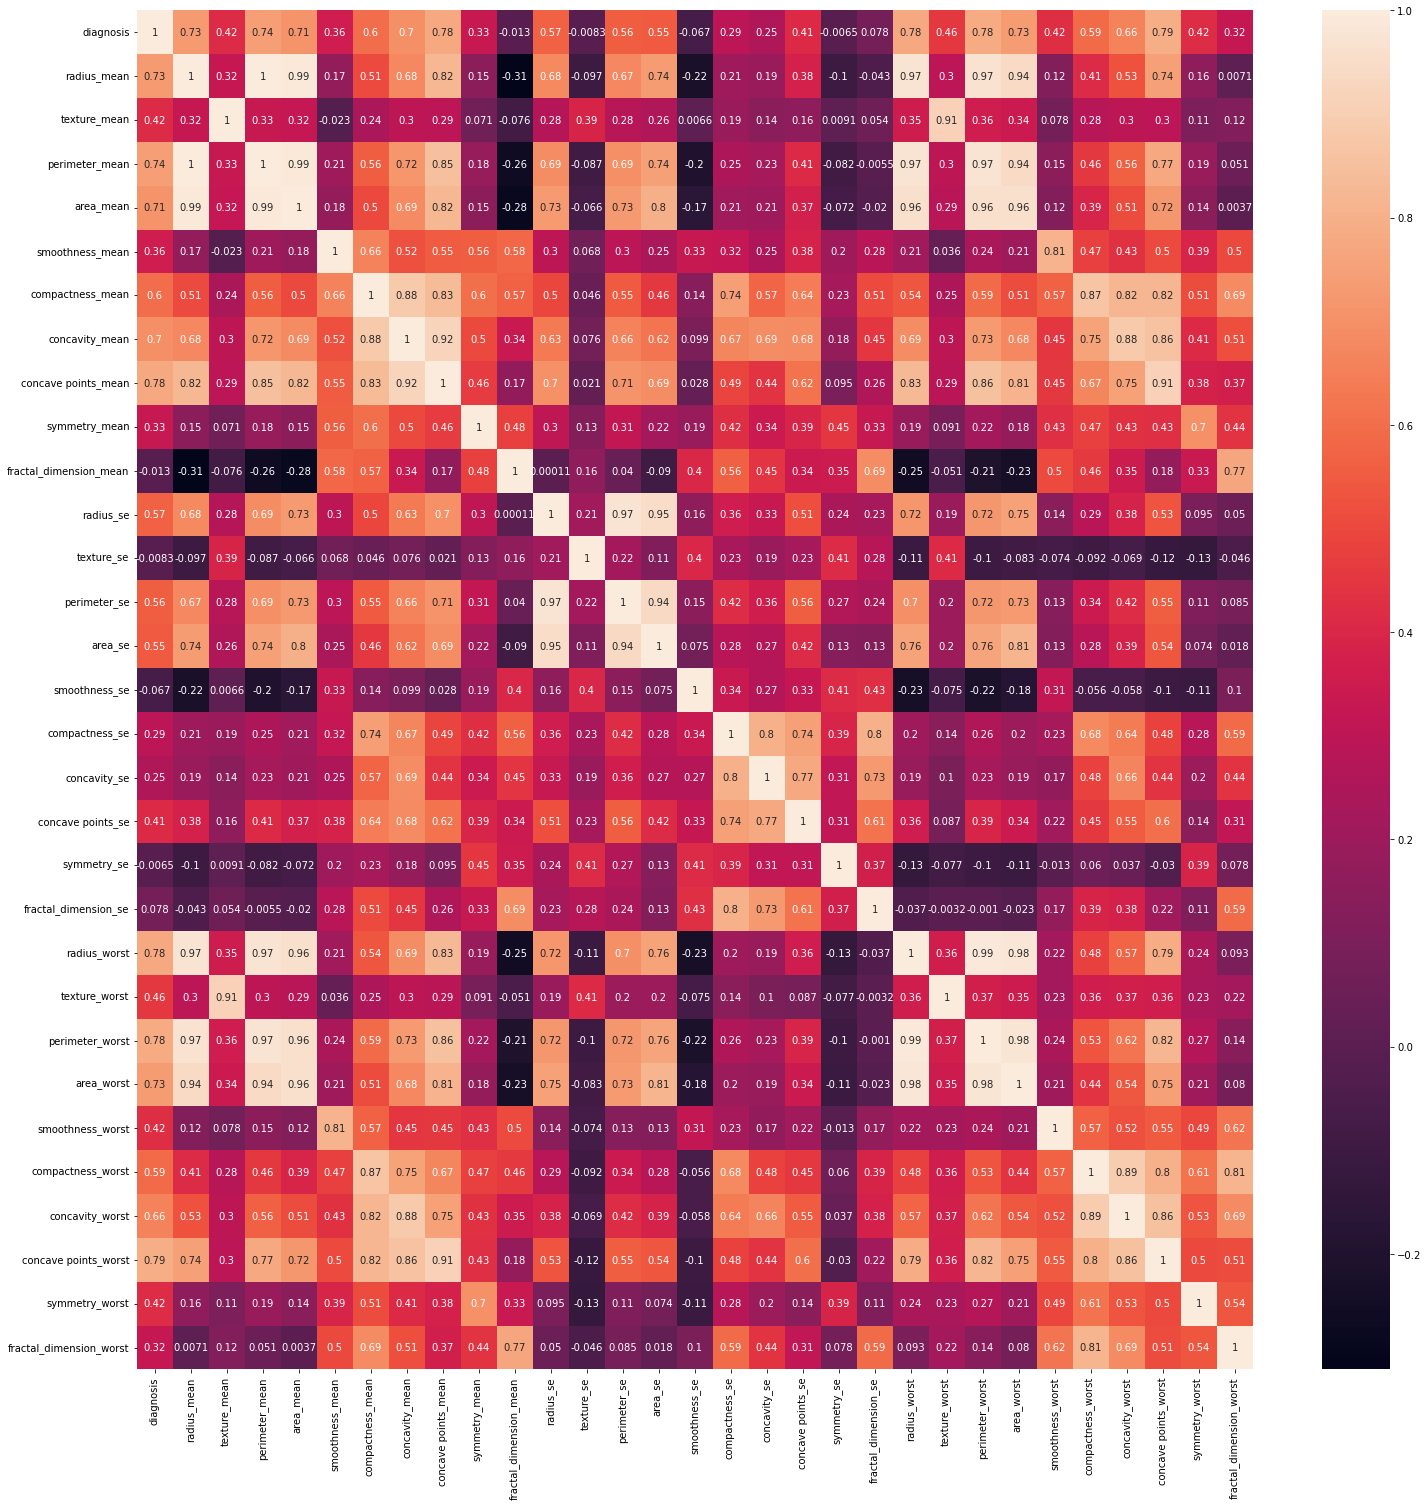

In [117]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

In [118]:
data.corr()['diagnosis']

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

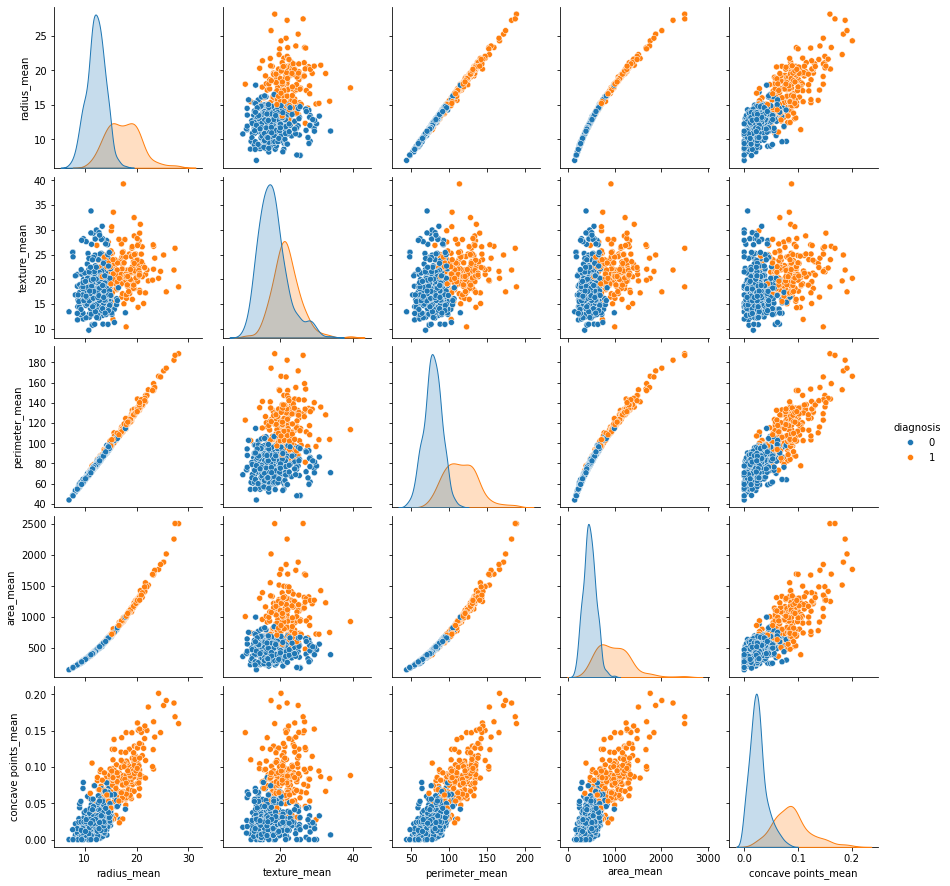

In [119]:
sns.pairplot(data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','concave points_mean']],hue=('diagnosis'))
plt.show()

## Step 3:Data Preprocessing and Feature Engineering

In [120]:
X=data.drop(columns=['diagnosis'])
y=data[['diagnosis']]

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
std=StandardScaler()

In [123]:
X_std=std.fit_transform(X)

In [124]:
X=pd.DataFrame(X_std,columns=X.columns)

In [125]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Step 4: Principal Component Analysis (PCA)

- Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used to reduce the number of features in a dataset while preserving the most important information. It works by transforming the original features into a new set of orthogonal variables called principal components.
- We use a scree plot to determine the number of principal component to retain. When the eigen value curve lies horizontally, it suggests that adding more components does not significantlly increaset the explained variance, indicating the appropriate number of componenets to select.


In [126]:
from sklearn.decomposition import PCA

In [127]:
pca=PCA()

In [128]:
pca.fit(X)

PCA()

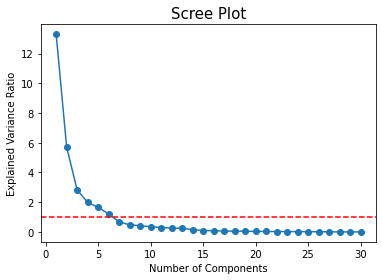

In [129]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_, marker='o')
plt.axhline(y=1,color='r',linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot',fontsize=15)
plt.show()

In [130]:
pca=PCA(n_components=6)

In [131]:
X_reduced=pd.DataFrame(pca.fit_transform(X),columns=[f'PC{i+1}' for i in range(6)])

In [132]:
X_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411426
1,2.387802,-3.768172,-0.529292,1.118264,0.621775,0.028654
2,5.733896,-1.075174,-0.551747,0.912083,-0.177086,0.541449
3,7.122953,10.275589,-3.232789,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940640,0.546748,-1.226492


## Step 5: Model Building and Evaluation

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state=45)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lg=LogisticRegression()

In [137]:
lg.fit(X_train,y_train)

LogisticRegression()

In [138]:
y_pred=lg.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [140]:
accuracy_score(y_test,y_pred)

0.9824561403508771

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

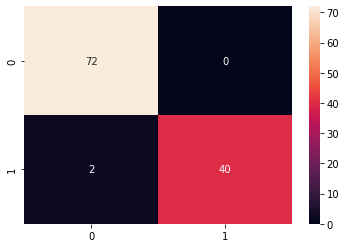

In [142]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn=KNeighborsClassifier(n_neighbors=5)

In [145]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [146]:
y_pred=knn.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

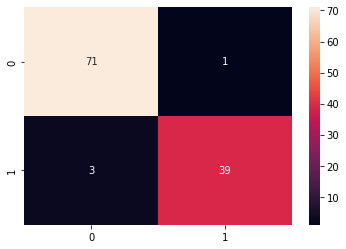

In [149]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf=RandomForestClassifier()

In [152]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred=rf.predict(X_test)

In [154]:
accuracy_score(y_test,y_pred)

0.956140350877193

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

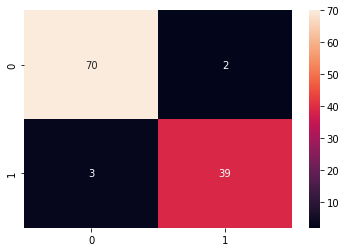

In [156]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### Support Vector Machine

In [157]:
from sklearn.svm import SVC

In [158]:
svm=SVC(probability=True)

In [159]:
svm.fit(X_train,y_train)

SVC(probability=True)

In [160]:
y_pred=svm.predict(X_test)

In [161]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

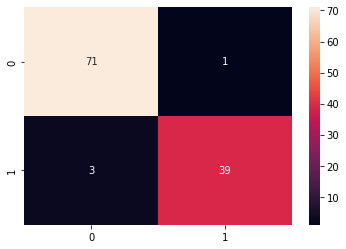

In [163]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [164]:
from xgboost import XGBClassifier

In [165]:
xgb=XGBClassifier()

In [166]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [167]:
y_pred=xgb.predict(X_test)

In [168]:
accuracy_score(y_test,y_pred)

0.9649122807017544

<AxesSubplot:>

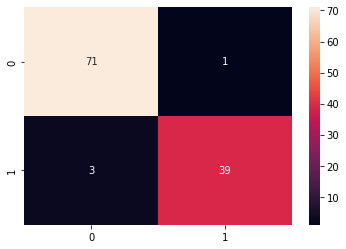

In [169]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Step 6: Conclusion

- Based on the evaluation, various classifiers demonstrate strong performance in accurately distinguishing between benign and malignant breast cancer tumors, with logistic regression showing the highest accuracy.
